In [1]:
# Import Package
from utils import imageUtils
from utils import postProcessing
from utils import MultiDefectDetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
import os
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.utils import write_image
import chainer
import math
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

#load Data
root = './data/3Types/Data3TypesYminXminYmaxXmax8'
dataset = MultiDefectDetectionDataset(data_dir=root, split='train')
dataset_human = MultiDefectDetectionDataset(data_dir=root, split='Stablehuman')
bbox_label_names = ('111', 'dot','100')
# DataSet Statistics
print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_human))
print('type of defects: ', bbox_label_names)
# Faster R-CNN model

use_gpu = False
proposal_params = {'min_size': 8,'nms_thresh':0.4}
model = FasterRCNNVGG16(n_fg_class=3,
                        pretrained_model='modelResults/snapshot_model_244000_Shufulle.npz',
                        ratios=[ 0.5, 1, 1.5, 2, 2.5, 4,8,16], anchor_scales=[1, 4, 8, 16], min_size=1024,
                        max_size=1024, proposal_creator_params=proposal_params)
if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()

# Problem Images
# g2_midonzone_GBtowardsfront_0010.jpg

total number of training images:  1200
total number of test images:  1
type of defects:  ('111', 'dot', '100')


In [2]:
# Loop testing images to check the dsitribution of r_eff
List_0_111 = list()
List_1_blackdot = list()
List_2_100 = list()

Results = list()
Results.append(List_0_111)
Results.append(List_1_blackdot)
Results.append(List_2_100)

# import functions
from utils.postProcessing import img_ellipse_fitting_3kinds_stat
# img_ellipse_fitting_3kinds_stat(img,bbox,labels,Results)

for imgdata in dataset_human:
    #fig = plt.figure(figsize=(10,10))
    #ax1 = fig.add_subplot(1, 1, 1)
    img, bbox, labels = imgdata
    model.score_thresh = 0.1
    bboxes, labels, scores = model.predict([img])
    img_ellipse_fitting_3kinds_stat(img,bboxes[0], labels[0],Results)
    #visualization.vis_bbox(img, bbox, labels, label_names=bbox_label_names, ax=ax1)
    #plt.show()

print(Results)

/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


(82, 83)
(82, 82)
(66, 68)


/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/filters/thresholding.py:221: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/filters/thresholding.py:223: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '
/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/r

In [1]:
Reff111 = list()
Reff100 = list()

for item in Results[0]:
    Reff111.append(np.max(item)*2)
    
for item in Results[2]:
    Reff100.append(np.max(item)*2)

NameError: name 'Results' is not defined

In [9]:
print('The average effective radius of 111 is %f'%(np.average(Reff111)))
print('The average effective radius of BlackDots is %f'%(np.average(Results[1])))
print('The average effective radius of 100 is %f'%(np.average(Reff100)))

The average effective radius of 111 is 45.622222
The average effective radius of BlackDots is 7.660000
The average effective radius of 100 is 43.428571


In [10]:
# Calculate SEM
print('The SEM radius of 111 is %f'%(np.std(Reff111)/np.sqrt(len(Reff111))))
print('The SEM radius of 100 is %f'%(np.std(Reff100)/np.sqrt(len(Reff100))))
print('The SEM radius of BlackDots is %f'%(np.std(Results[1])/np.sqrt(len(Results[1]))))

The SEM radius of 111 is 3.777503
The SEM radius of 100 is 3.600972
The SEM radius of BlackDots is 0.246876



The average effective radius of 111 is 20.127729

The average effective radius of BlackDots is 7.700002

The average effective radius of 100 is 19.087805


<Figure size 1080x432 with 0 Axes>

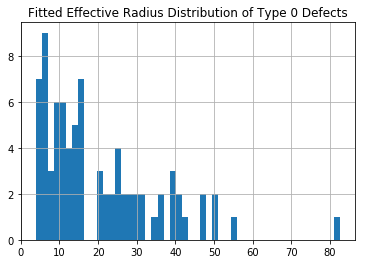

<Figure size 1080x432 with 0 Axes>

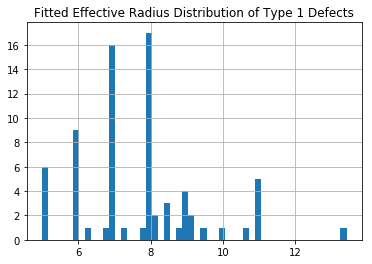

<Figure size 1080x432 with 0 Axes>

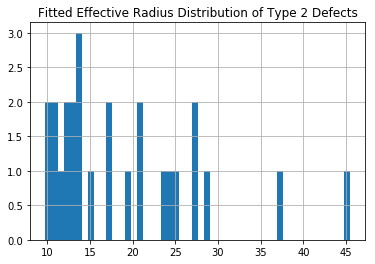

In [23]:
# Plot Size Distribution in each type
for typeInd in range(3):
    DF= pd.DataFrame(columns=['R_eff'])
    for (index,RaRb) in enumerate(Results[typeInd]):
        DF.loc[index] = [np.sqrt(RaRb[0] * RaRb[1] )]
    print()
    if typeInd == 0:
        print('The average effective radius of 111 is %f'%(np.average(DF['R_eff'])))
    elif typeInd == 1:
        print('The average effective radius of BlackDots is %f'%(np.average(DF['R_eff'])))
    else:
        print('The average effective radius of 100 is %f'%( np.average(DF['R_eff']) ))
    # Ploting    
    histgramFileName = "Fitted_Hist_Effective_Radius_of_" + str(typeInd)
    fig = plt.figure(figsize=(15,6))
    fig, ax = plt.subplots(1,1)
    DF.hist(bins=50, ax=ax)
    plt.title('Fitted Effective Radius Distribution of Type ' + str(typeInd) + ' Defects')
    fig.savefig(histgramFileName)